---
<h1 style="text-align: center;">Modelagem de Redes Neurais para Previsão de Custos em Seguros de Saúde</h1>

*Discente:*

    *   Gabriel D'assumpção de Carvalho

*Data:* 19/08/2024

---
---

# Introdução

As doenças cardiovasculares permanecem como a principal causa de mortalidade no Brasil, de acordo com o estudo Global Burden of Disease (GBD) de 2019 e os dados do Sistema Único de Saúde (SUS). O aumento preocupante na incidência de ataques cardíacos entre jovens e adultos é amplamente atribuído à falta de atividade física e a uma dieta inadequada. Esse panorama sublinha a necessidade urgente de promover hábitos de vida mais saudáveis, seguindo a recomendação de Michael Pollan: "descasque mais, desembale menos", que incentiva o consumo de alimentos frescos e não processados.

A deterioração da saúde pública tem levado a um crescimento significativo no setor de planos de saúde. De acordo com a Agência Nacional de Saúde Suplementar (ANS), o Brasil registrou um aumento de aproximadamente 20,5 milhões de novos beneficiários de planos de assistência médica entre março de 2000 e junho de 2024.

<p align="center">
  <span style="font-size: smaller;">Gráfico 01</span>
</p>
<p align="center">
  <img src="beneficiario_ans.png" alt="Gráfico mostrando o crescimento dos beneficiários de planos de saúde no Brasil" width="800"/>
</div>
</p>
<p align="center">
  <span style="font-size: smaller;">Fonte: Agência Nacional de Seguro (ANS)
  </span>
</p>

O gráfico acima ilustra o aumento no número de beneficiários ao longo de 24 anos, refletindo a crescente demanda por cuidados médicos. Esse crescimento torna essencial a análise e previsão das despesas associadas aos seguros de saúde, que é o objetivo principal deste projeto.

Para a realização desta análise, será utilizada uma base de dados disponível no [Kaggle](https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance/data). Esta base contém 303 observações e 6 características, com o custo do seguro médico sendo a variável alvo. A seguir, apresentamos as variáveis da base de dados:

| Atributo   | Descrição                                                      | Tipo                    |
|------------|----------------------------------------------------------------|-------------------------|
| Idade      | A idade da pessoa segurada.                                    | Inteiro                 |
| Sexo       | Gênero (masculino ou feminino) do segurado.                     | Categórico - Binário    |
| IMC        | Índice de Massa Corporal: uma medida de gordura corporal baseada na altura e no peso. | Contínuo                |
| Crianças   | O número de dependentes cobertos.                               | Inteiro                 |
| Fumante    | Se o segurado é fumante (sim ou não).                           | Categórico - Binário    |
| Região     | A área geográfica de cobertura.                                | Categórico - Nominal    |
| Encargos   | Os custos do seguro médico incorridos pelo segurado.            | Contínuo                |


# Fundamentos Teóricos e Metodológicos

O objetivo deste trabalho é prever os custos do seguro médico com base nas características dos clientes, configurando-se como um problema de regressão. A abordagem tradicional de regressão linear pode ser representada pela seguinte equação:

<p style="text-align: right;">
(1)
</p>

$$
\hat{y} = \beta_{0} + \beta_{1} \cdot x_{1} + \epsilon \hspace{3em} \text{(1)}
$$

Entretanto, as suposições subjacentes à regressão linear, como a normalidade das variáveis, a independência entre as características dos clientes e a normalidade dos resíduos, podem não ser atendidas neste contexto. Por essa razão, este estudo opta por utilizar redes neurais, especificamente o Perceptron Multicamadas (MLP), para realizar a previsão dos custos do seguro.

Modelos com múltiplas camadas, como o MLP, são mais adequados para resolver problemas complexos. Redes com $S \in \mathbb{N}$ neurônios são compostas por conjuntos de neurônios $O = \{o_1, o_2, \ldots, o_s\}$, vieses  $B = \{b_1, b_2, \ldots, b_s\}$, e pesos $W = \{w_{1,1}, w_{1,2}, \ldots, w_{1,k}, w_{2,1}, w_{2,2}, \ldots, w_{2,k}, \ldots, w_{j,k}\}$.


Copy code
<p align="center">
  <span style="font-size: smaller;">Gráfico 02</span>
</p>
<div style="text-align: center;">
    <img src="multicamadas_perceptron.png" alt="Arquitetura do Perceptron Multicamadas" width="400"/>
</div>  
<p align="center">
  <span style="font-size: smaller;">Fonte: <a href="https://www.researchgate.net/figure/Schematic-structure-of-a-perceptron-neural-network_fig2_260291992">https://www.researchgate.net/figure/Schematic-structure-of-a-perceptron-neural-network_fig2_260291992</a></span>
</p>

A entrada dos neurônios a partir da segunda camada oculta depende da saída dos neurônios da camada anterior. A função de ativação é dada por:


$$
\phi_i(net_j) = \phi_i\left(\sum_{k=1}^{n} w_{k,j} \cdot o_k + b_j\right)
$$

onde

$$
net_j = \sum_{k=1}^{n} w_{k,j} \cdot o_k + b_j
$$





Este crescimento reflete a crescente demanda por cuidados médicos, tornando crucial a análise e previsão das despesas associadas aos seguros de saúde, que é o foco deste projeto de aprendizado de máquina.

## Bibliotecas Utilizadas

In [1]:
# Configurando o modo de exibição do pandas
import pandas as pd
pd.options.display.float_format = "{:.4f}".format

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Desativa todos os avisos
import warnings
warnings.filterwarnings("ignore")

2024-09-18 10:12:02.533162: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-18 10:12:02.582289: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-18 10:12:02.597355: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-18 10:12:02.877537: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Coleta dos Dados

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/gabrieldadcarvalho/neural_network/main/projeto/insurance.csv")

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Exploração dos Dados

A exploração dos dados visa identificar padrões, tendências e anomalias que podem impactar a análise. Outliers são identificados e avaliados quanto à sua significância, enquanto correlações entre variáveis são analisadas para identificar relações importantes. A análise de variáveis categóricas inclui a avaliação das frequências e modas, e visualizações adicionais, como heatmaps e pair plots, são utilizadas para suportar a análise e identificar padrões mais complexos.

In [3]:
# Verificando as 5 primeiras linhas de x
print(y.head())

0   16884.9240
1    1725.5523
2    4449.4620
3   21984.4706
4    3866.8552
Name: charges, dtype: float64


## Variáveis Explicativas
Vamos realizar uma análise exploratória das variáveis explicativas do conjunto de dados. Abaixo estão as estatísticas descritivas e visualizações para cada variável.

In [4]:
X.describe()

,age,imc,children
count,1338.0000,1338.0000,1338.0000
mean,39.2070,30.6634,1.0949
std,14.0500,6.0982,1.2055
min,18.0000,15.9600,0.0000
25%,27.0000,26.2963,0.0000
50%,39.0000,30.4000,1.0000
75%,51.0000,34.6938,2.0000
max,64.0000,53.1300,5.0000


In [5]:
r = X['region'].value_counts()
r.index
r.values

array([364, 325, 325, 324])

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   imc       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoke     1338 non-null   object 
 5   region    1338 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 62.8+ KB


### Idade

In [7]:
X['age'].describe()

count   1338.0000
mean      39.2070
std       14.0500
min       18.0000
25%       27.0000
50%       39.0000
75%       51.0000
max       64.0000
Name: age, dtype: float64

In [8]:
X['sex'].head()

0    female
1      male
2      male
3      male
4      male
Name: sex, dtype: object

In [9]:
X['age'].mode()

0    18
Name: age, dtype: int64

### Correlação



In [10]:
idade_m = X[X['sex'] == 'male']['age']
idade_f = X[X['sex'] == 'female']['age']
t = (idade_m.mean() - idade_f.mean()) / np.sqrt((idade_m.var(ddof=1)/len(idade_m) + idade_f.var(ddof=1) / len(idade_f)))
print(f"t-statistic: {t}")
import scipy.stats as stats

t_crit = stats.t.ppf(0.975, len(idade_m)+len(idade_f)-2)
t_crit

t-statistic: -0.7624734701767805


In [11]:
import scipy.stats as stats

t_crit = stats.t.ppf(0.975, len(idade_m)+len(idade_f)-2)
t_crit

1.9617412190546957

In [12]:
imc_m = X[X['sex'] == 'male']['imc']
imc_f = X[X['sex'] == 'female']['imc']
t = (imc_m.mean() - imc_f.mean()) / np.sqrt((imc_m.var(ddof=1)/len(imc_m) + imc_f.var(ddof=1) / len(imc_f)))
print(f"t-statistic: {t}")

t-statistic: 1.697027933124022


In [13]:
idade_s_y = X[X['smoke'] == 'yes']['age']
idade_s_n = X[X['smoke'] == 'no']['age']
t = (idade_s_y.mean() - idade_s_n.mean()) / np.sqrt((idade_s_y.var(ddof=1)/len(idade_s_y) + idade_s_n.var(ddof=1) / len(idade_s_n)))
print(f"t-statistic: {t}")

t-statistic: -0.9209603068505062


In [14]:
imc_s_y = X[X['smoke'] == 'yes']['imc']
imc_s_n = X[X['smoke'] == 'no']['imc']
t = (imc_s_y.mean() - imc_s_n.mean()) / np.sqrt((imc_s_y.var(ddof=1)/len(imc_s_y) + imc_s_n.var(ddof=1) / len(imc_s_n)))
print(f"t-statistic: {t}")

t-statistic: 0.1335212194724234


### ANOVA

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   imc       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoke     1338 non-null   object 
 5   region    1338 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 62.8+ KB


In [16]:
X['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [17]:
from scipy.stats import f
age_se = np.array(X[X['region'] == 'southeast']['age'])
age_sw = np.array(X[X['region'] == 'southwest']['age'])
age_ne = np.array(X[X['region'] == 'northwest']['age'])
age_bw = np.array(X[X['region'] == 'northeast']['age'])

mean_se = np.mean(age_se)
mean_sw = np.mean(age_sw)
mean_ne = np.mean(age_ne)
mean_bw = np.mean(age_bw)

all_a_r = np.concatenate([age_se, age_sw, age_ne, age_bw])
mean_all = np.mean(all_a_r)

k = 4
N = len(all_a_r)


QT = np.sum((all_a_r - mean_all) ** 2)

QG = len(age_se) * (mean_se - mean_all) ** 2 + \
     len(age_sw) * (mean_sw - mean_all) ** 2 + \
     len(age_ne) * (mean_ne - mean_all) ** 2 + \
     len(age_bw) * (mean_bw - mean_all) ** 2

QD = np.sum((age_se - mean_se) ** 2) + \
     np.sum((age_sw - mean_sw) ** 2) + \
     np.sum((age_ne - mean_ne) ** 2) + \
     np.sum((age_bw - mean_bw) ** 2)

df_between = k - 1
df_within = N - k

# Quadrado Médio Entre Grupos
MS_between = QG / df_between

# Quadrado Médio Dentro dos Grupos
MS_within = QD / df_within

F = MS_between / MS_within

alpha = 0.05
F_crit = f.ppf(1 - alpha, df_between, df_within)

print(f"Estatística F: {F}")
print(f"Valor Crítico F: {F_crit}")

if F > F_crit:
    print("Rejeitamos a hipótese nula.")
else:
    print("Não rejeitamos a hipótese nula.")

Estatística F: 0.07978158162436415
Valor Crítico F: 2.611573218649548
Não rejeitamos a hipótese nula.


In [18]:
print(df_between)
print(df_within)

3
1334


In [19]:
age_c0 = np.array(X[X['children'] == 0]['age'])
age_c1 = np.array(X[X['children'] == 1]['age'])
age_c2 = np.array(X[X['children'] == 2]['age'])
age_c3 = np.array(X[X['children'] == 3]['age'])
age_c4 = np.array(X[X['children'] == 4]['age'])
age_c5 = np.array(X[X['children'] ==  5]['age'])

mean_c0 = np.mean(age_c0)
mean_c1 = np.mean(age_c1)
mean_c2 = np.mean(age_c2)
mean_c3 = np.mean(age_c3)
mean_c4 = np.mean(age_c4)
mean_c5 = np.mean(age_c5)

all_a_c = np.concatenate([age_c0, age_c1, age_c2, age_c3, age_c4, age_c5])
mean_all = np.mean(all_a_c)

k = 6
N = len(all_a_c)


QG = len(age_c0) * (mean_c0 - mean_all) ** 2 + \
     len(age_c1) * (mean_c1 - mean_all) ** 2 + \
     len(age_c2) * (mean_c2 - mean_all) ** 2 + \
     len(age_c3) * (mean_c3 - mean_all) ** 2 + \
     len(age_c4) * (mean_c4 - mean_all) ** 2 + \
     len(age_c5) * (mean_c5 - mean_all) ** 2

QD = np.sum((age_c0 - mean_c0) ** 2) + \
     np.sum((age_c1 - mean_c1) ** 2) + \
     np.sum((age_c2 - mean_c2) ** 2) + \
     np.sum((age_c3 - mean_c3) ** 2) + \
     np.sum((age_c4 - mean_c4) ** 2) + \
     np.sum((age_c5 - mean_c5) ** 2)


df_between = k - 1
df_within = N - k

# Quadrado Médio Entre Grupos
MS_between = QG / df_between

# Quadrado Médio Dentro dos Grupos
MS_within = QD / df_within

F = MS_between / MS_within

alpha = 0.05
F_crit = f.ppf(1 - alpha, df_between, df_within)

print(f"Estatística F: {F}")
print(f"Valor Crítico F: {F_crit}")

if F > F_crit:
    print("Rejeitamos a hipótese nula.")
else:
    print("Não rejeitamos a hipótese nula.")

Estatística F: 1.497717337339237
Valor Crítico F: 2.220817484845099
Não rejeitamos a hipótese nula.


In [20]:
print(df_between)
print(df_within)

5
1332


In [21]:
# Dados
imc_se = np.array(X[X['region'] == 'southeast']['imc'])
imc_sw = np.array(X[X['region'] == 'southwest']['imc'])
imc_ne = np.array(X[X['region'] == 'northwest']['imc'])
imc_bw = np.array(X[X['region'] == 'northeast']['imc'])

# Cálculo das médias dos grupos
mean_se = np.mean(imc_se)
mean_sw = np.mean(imc_sw)
mean_ne = np.mean(imc_ne)
mean_bw = np.mean(imc_bw)

# Concatenação de todas as amostras para calcular a média global
all_i_r = np.concatenate([imc_se, imc_sw, imc_ne, imc_bw])
mean_all = np.mean(all_i_r)

# Número de grupos e total de amostras
k = 4
N = len(all_i_r)

# Quadrado Total e Quadrado Dentro dos Grupos
QG = len(imc_se) * (mean_se - mean_all) ** 2 + \
     len(imc_sw) * (mean_sw - mean_all) ** 2 + \
     len(imc_ne) * (mean_ne - mean_all) ** 2 + \
     len(imc_bw) * (mean_bw - mean_all) ** 2

QD = np.sum((imc_se - mean_se) ** 2) + \
     np.sum((imc_sw - mean_sw) ** 2) + \
     np.sum((imc_ne - mean_ne) ** 2) + \
     np.sum((imc_bw - mean_bw) ** 2)

# Graus de Liberdade
df_between = k - 1
df_within = N - k

# Quadrado Médio Entre Grupos e Dentro dos Grupos
MS_between = QG / df_between
MS_within = QD / df_within

# Estatística F
F = MS_between / MS_within

# Valor Crítico F
alpha = 0.05
F_crit = f.ppf(1 - alpha, df_between, df_within)

# Resultados
print(f"Estatística F: {F}")
print(f"Valor Crítico F: {F_crit}")

if F > F_crit:
    print("Rejeitamos a hipótese nula.")
else:
    print("Não rejeitamos a hipótese nula.")

Estatística F: 39.49505720170287
Valor Crítico F: 2.611573218649548
Rejeitamos a hipótese nula.


In [22]:
print(df_between)
print(df_within)

3
1334


In [23]:
# Dados
imc_se = np.array(X[X['region'] == 'southeast']['imc'])
imc_sw = np.array(X[X['region'] == 'southwest']['imc'])
imc_ne = np.array(X[X['region'] == 'northwest']['imc'])
imc_bw = np.array(X[X['region'] == 'northeast']['imc'])

# Cálculo das médias dos grupos
mean_se = np.mean(imc_se)
mean_sw = np.mean(imc_sw)
mean_ne = np.mean(imc_ne)
mean_bw = np.mean(imc_bw)

# Concatenação de todas as amostras para calcular a média global
all_i_r = np.concatenate([imc_se, imc_sw, imc_ne, imc_bw])
mean_all = np.mean(all_i_r)

# Número de grupos e total de amostras
k = 4
N = len(all_i_r)

# Quadrado Total e Quadrado Dentro dos Grupos
QG = len(imc_se) * (mean_se - mean_all) ** 2 + \
     len(imc_sw) * (mean_sw - mean_all) ** 2 + \
     len(imc_ne) * (mean_ne - mean_all) ** 2 + \
     len(imc_bw) * (mean_bw - mean_all) ** 2

QD = np.sum((imc_se - mean_se) ** 2) + \
     np.sum((imc_sw - mean_sw) ** 2) + \
     np.sum((imc_ne - mean_ne) ** 2) + \
     np.sum((imc_bw - mean_bw) ** 2)

# Graus de Liberdade
df_between = k - 1
df_within = N - k

# Quadrado Médio Entre Grupos e Dentro dos Grupos
MS_between = QG / df_between
MS_within = QD / df_within

# Estatística F
F = MS_between / MS_within

# Valor Crítico F
alpha = 0.05
F_crit = f.ppf(1 - alpha, df_between, df_within)

# Resultados
print(f"Estatística F: {F}")
print(f"Valor Crítico F: {F_crit}")

if F > F_crit:
    print("Rejeitamos a hipótese nula.")
else:
    print("Não rejeitamos a hipótese nula.")

Estatística F: 39.49505720170287
Valor Crítico F: 2.611573218649548
Rejeitamos a hipótese nula.


In [24]:
from scipy.stats import f
children_se = np.array(X[X['region'] == 'southeast']['children'])
children_sw = np.array(X[X['region'] == 'southwest']['children'])
children_ne = np.array(X[X['region'] == 'northwest']['children'])
children_bw = np.array(X[X['region'] == 'northeast']['children'])

mean_se = np.mean(children_se)
mean_sw = np.mean(children_sw)
mean_ne = np.mean(children_ne)
mean_bw = np.mean(children_bw)

all_c_r = np.concatenate([children_se, children_sw, children_ne, children_bw])
mean_all = np.mean(all_c_r)

k = 4
N = len(all_c_r)


QT = np.sum((all_c_r - mean_all) ** 2)

QG = len(children_se) * (mean_se - mean_all) ** 2 + \
     len(children_sw) * (mean_sw - mean_all) ** 2 + \
     len(children_ne) * (mean_ne - mean_all) ** 2 + \
     len(children_bw) * (mean_bw - mean_all) ** 2

QD = np.sum((children_se - mean_se) ** 2) + \
     np.sum((children_sw - mean_sw) ** 2) + \
     np.sum((children_ne - mean_ne) ** 2) + \
     np.sum((children_bw - mean_bw) ** 2)

df_between = k - 1
df_within = N - k

# Quadrado Médio Entre Grupos
MS_between = QG / df_between

# Quadrado Médio Dentro dos Grupos
MS_within = QD / df_within

F = MS_between / MS_within

alpha = 0.05
F_crit = f.ppf(1 - alpha, df_between, df_within)

print(f"Estatística F: {F}")
print(f"Valor Crítico F: {F_crit}")

if F > F_crit:
    print("Rejeitamos a hipótese nula.")
else:
    print("Não rejeitamos a hipótese nula.")

Estatística F: 0.7174932934640633
Valor Crítico F: 2.611573218649548
Não rejeitamos a hipótese nula.


In [25]:
print(df_between)
print(df_within)

3
1334


In [29]:
custo_m = y[X['sex'] == 'male']
custo_f = y[X['sex'] == 'female']
t = (custo_m.mean() - custo_f.mean()) / np.sqrt((custo_m.var(ddof=1)/len(custo_m) + custo_f.var(ddof=1) / len(custo_f)))
print(f"t-statistic: {t}")
import scipy.stats as stats

t_crit = stats.t.ppf(0.975, len(custo_m)+len(custo_f)-2)
t_crit

t-statistic: 2.1008878232359565


1.9617412190546957

### IMC - Região

In [ ]:
plt.figure(figsize=(12, 6))
plt.boxplot([X[X['region'] == region]['imc'] for region in X['region'].unique()],
            labels=X['region'].unique())
plt.xlabel('Região')
plt.ylabel('IMC')
plt.title('Boxplot do IMC por Região')
plt.xticks(rotation=45)
plt.show()

## Variável Resposta

In [ ]:
custo_m = y[X['sex'] == 'male']
custo_f = y[X['sex'] == 'female']
t = (custo_m.mean() - custo_f.mean()) / np.sqrt((custo_m.var(ddof=1)/len(custo_m) + custo_f.var(ddof=1) / len(custo_f)))
print(f"t-statistic: {t}")
import scipy.stats as stats

t_crit = stats.t.ppf(0.975, len(custo_m)+len(custo_f)-2)
t_crit

In [31]:
custo_s_y = y[X['smoke'] == 'yes']
custo_s_n = y[X['smoke'] == 'no']
t = (custo_s_y.mean() - custo_s_n.mean()) / np.sqrt((custo_s_y.var(ddof=1)/len(custo_s_y) + custo_s_n.var(ddof=1) / len(custo_s_n)))
print(f"t-statistic: {t}")
import scipy.stats as stats

t_crit = stats.t.ppf(0.975, len(custo_s_y)+len(custo_s_n)-2)
t_crit

t-statistic: 32.751887766341824


1.9617412190546957

In [26]:
dummie = pd.get_dummies(X, ['sex', 'smoke', 'region'])
X_t = pd.concat([X,dummie],axis=1)
X_t.drop(columns={'sex', 'smoke', 'region'}, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=0.2, random_state=42)

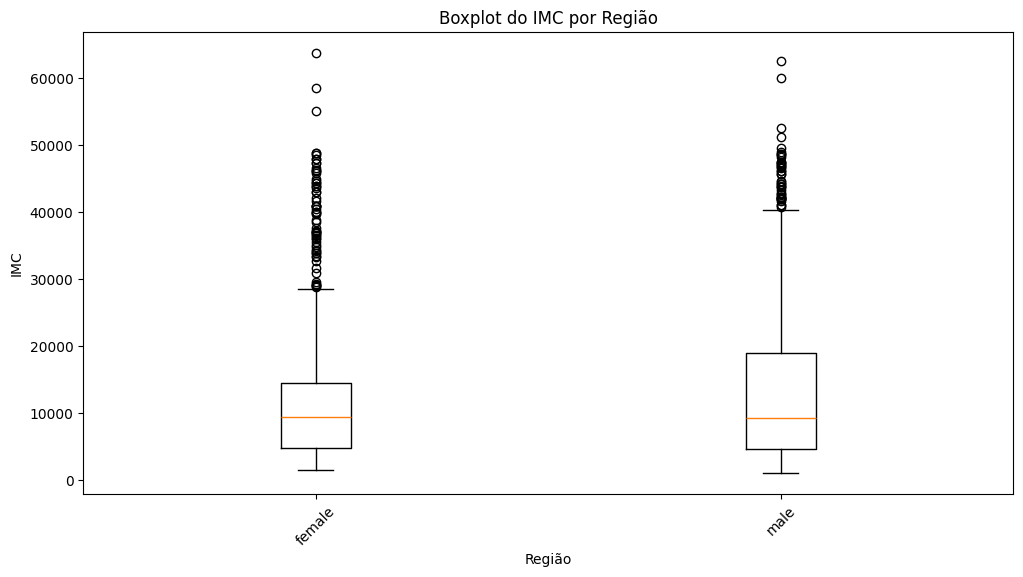

In [32]:
plt.figure(figsize=(12, 6))
plt.boxplot([y[X['sex'] == region]for region in X['sex'].unique()],
            labels=X['sex'].unique())
plt.xlabel('Região')
plt.ylabel('IMC')
plt.title('Boxplot do IMC por Região')
plt.xticks(rotation=45)
plt.show()

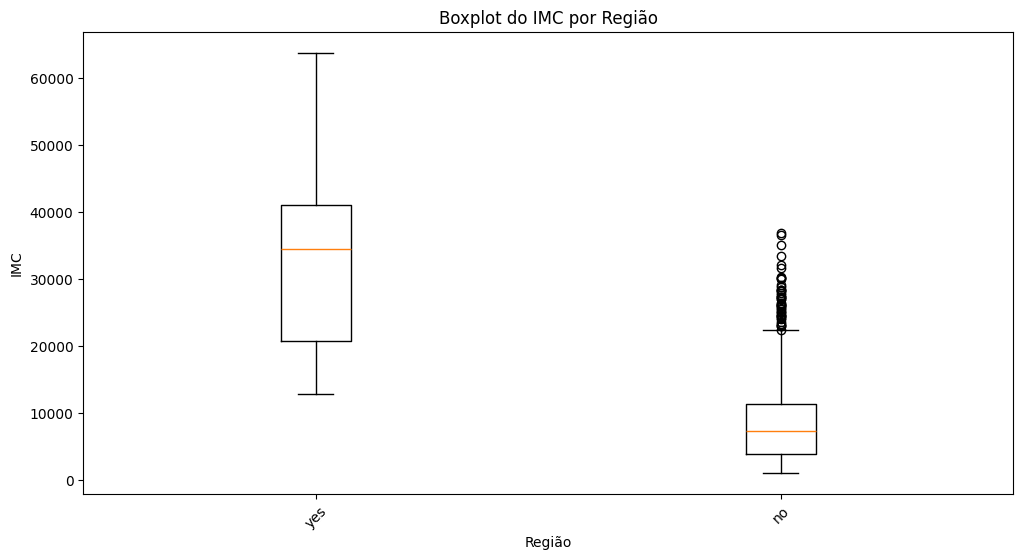

In [33]:
plt.figure(figsize=(12, 6))
plt.boxplot([y[X['smoke'] == region]for region in X['smoke'].unique()],
            labels=X['smoke'].unique())
plt.xlabel('Região')
plt.ylabel('IMC')
plt.title('Boxplot do IMC por Região')
plt.xticks(rotation=45)
plt.show()